In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1. Load the full dataset
df = pd.read_csv("C:\\Users\\User\\OneDrive\\Documents\\Farwa Projects\\accepted_2007_to_2018q4.csv\\accepted_2007_to_2018Q4.csv", low_memory=False)
print("dataset shape before", df.shape)
# Step 2. Filter for only completed loans
df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

print(f"Dataset Loaded. Total Records: {df.shape[0]} | Total Columns: {df.shape[1]}")

dataset shape before (2260701, 151)
Dataset Loaded. Total Records: 1345310 | Total Columns: 151


In [14]:
# Duplicate rows check
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Summary of columns and types
print(df.dtypes.value_counts())

Number of duplicate rows: 0
float64    113
object      38
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_5388\3245291377.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.index[:30], y=missing_data.values[:30], palette='Reds_r')


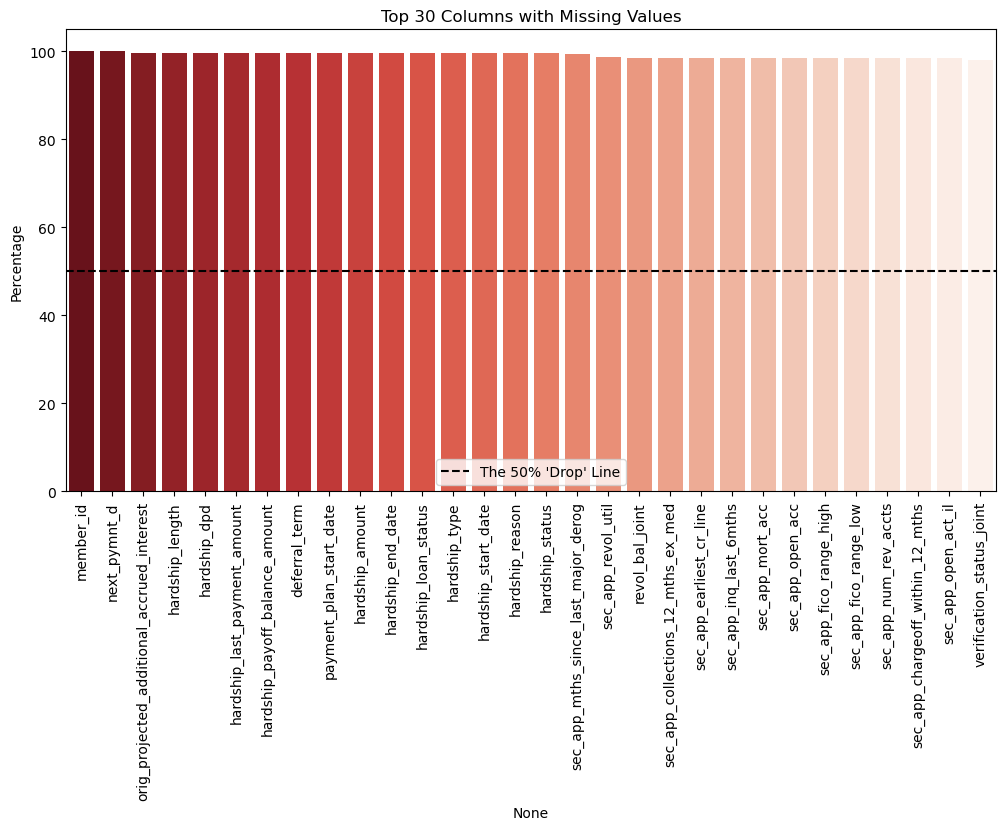

In [15]:
# Calculating percentage of missing values
missing_data = (df.isnull().sum() / len(df)) * 100
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

# Plotting for top 30 missing columns
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_data.index[:30], y=missing_data.values[:30], palette='Reds_r')
plt.xticks(rotation=90)
plt.title("Top 30 Columns with Missing Values")
plt.ylabel("Percentage")
plt.axhline(y=50, color='black', linestyle='--', label="The 50% 'Drop' Line")
plt.legend()
plt.show()

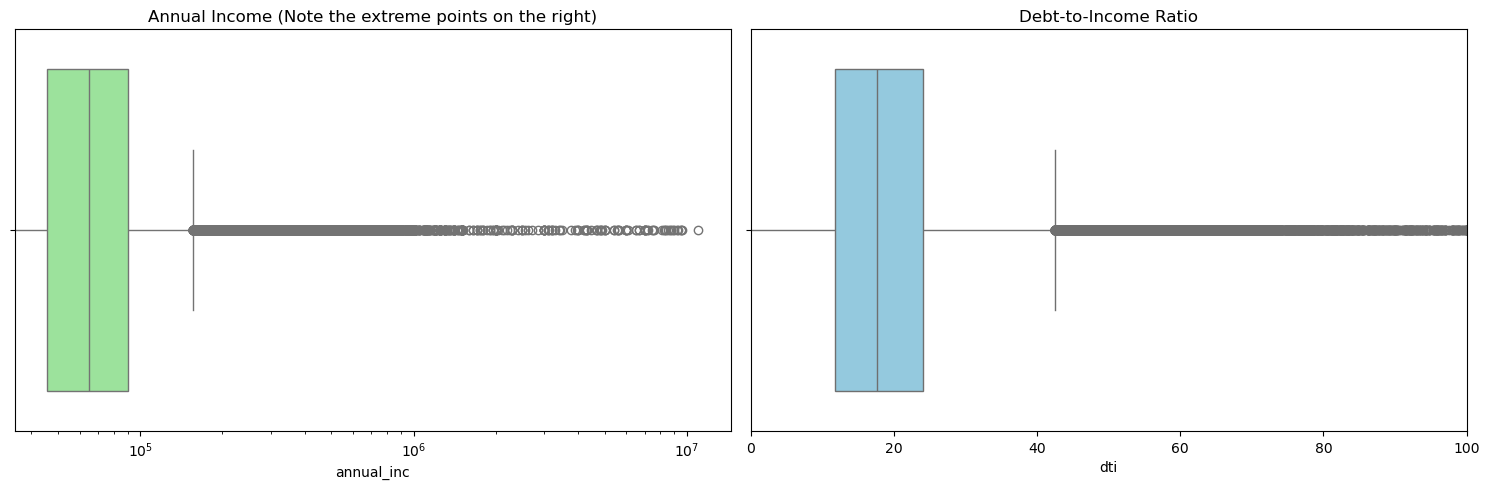

In [16]:
# Set up a grid for boxplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot Annual Income - using logscale for higher amounts
sns.boxplot(ax=axes[0], x=df['annual_inc'], color='lightgreen')
axes[0].set_title('Annual Income (Note the extreme points on the right)')
axes[0].set_xscale('log') # Log scale makes the box visible

# Plot Debt-To-Income (DTI)
sns.boxplot(ax=axes[1], x=df['dti'], color='skyblue')
axes[1].set_title('Debt-to-Income Ratio')
axes[1].set_xlim(0, 100) 

plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_5388\2210021941.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='loan_status', palette='viridis')


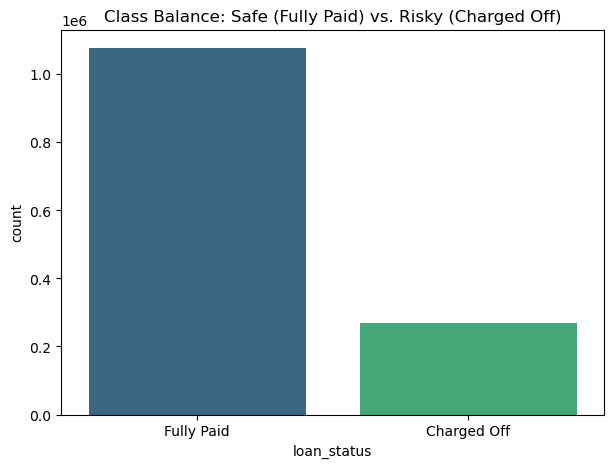

Target Percentages:
loan_status
Fully Paid     80.037389
Charged Off    19.962611
Name: proportion, dtype: float64


In [17]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='loan_status', palette='viridis')
plt.title("Class Balance: Safe (Fully Paid) vs. Risky (Charged Off)")
plt.show()

# Print the exact percentages to see imbalance
print("Target Percentages:")
print(df['loan_status'].value_counts(normalize=True) * 100)

In [18]:
# Calculating the missing percentage for ALL columns
missing_report = df.isnull().mean() * 100

# Filtering to see only columns that have at least one missing value
missing_report = missing_report[missing_report > 0].sort_values(ascending=False)

print(f"Total columns with missing values: {len(missing_report)}")
print("\n Top 20 Missing Columns (%) ")
print(missing_report.head(20))

# To see the FULL list in your notebook, we can run:
# with pd.option_context('display.max_rows', None): print(missing_report)

Total columns with missing values: 105

 Top 20 Missing Columns (%) 
member_id                                     100.000000
next_pymnt_d                                  100.000000
orig_projected_additional_accrued_interest     99.720585
hardship_length                                99.572292
hardship_dpd                                   99.572292
hardship_last_payment_amount                   99.572292
hardship_payoff_balance_amount                 99.572292
deferral_term                                  99.572292
payment_plan_start_date                        99.572292
hardship_amount                                99.572292
hardship_end_date                              99.572292
hardship_loan_status                           99.572292
hardship_type                                  99.572292
hardship_start_date                            99.572292
hardship_reason                                99.572292
hardship_status                                99.572292
sec_app_mths_since_

In [19]:
# Selecting only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Creating a dictionary to store outlier counts
outlier_counts = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count how many rows are outside these bounds
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

# Convert to Series and show columns with the MOST outliers
outlier_report = pd.Series(outlier_counts).sort_values(ascending=False)
print("\n Columns with the Most Outliers ")
print(outlier_report.head(20))


 Columns with the Most Outliers 
num_accts_ever_120_pd      302598
delinq_2yrs                259251
pub_rec                    227885
tot_coll_amt               195766
recoveries                 184684
collection_recovery_fee    176539
pub_rec_bankruptcies       167660
mths_since_recent_bc       119744
bc_open_to_buy             111563
total_rec_int               97999
mo_sin_rcnt_rev_tl_op       97870
pct_tl_nvr_dlq              82069
revol_bal                   79691
total_bc_limit              78810
num_il_tl                   78309
mo_sin_rcnt_tl              76641
total_bal_ex_mort           75816
total_rev_hi_lim            74957
last_pymnt_amnt             74155
num_tl_90g_dpd_24m          73251
dtype: int64


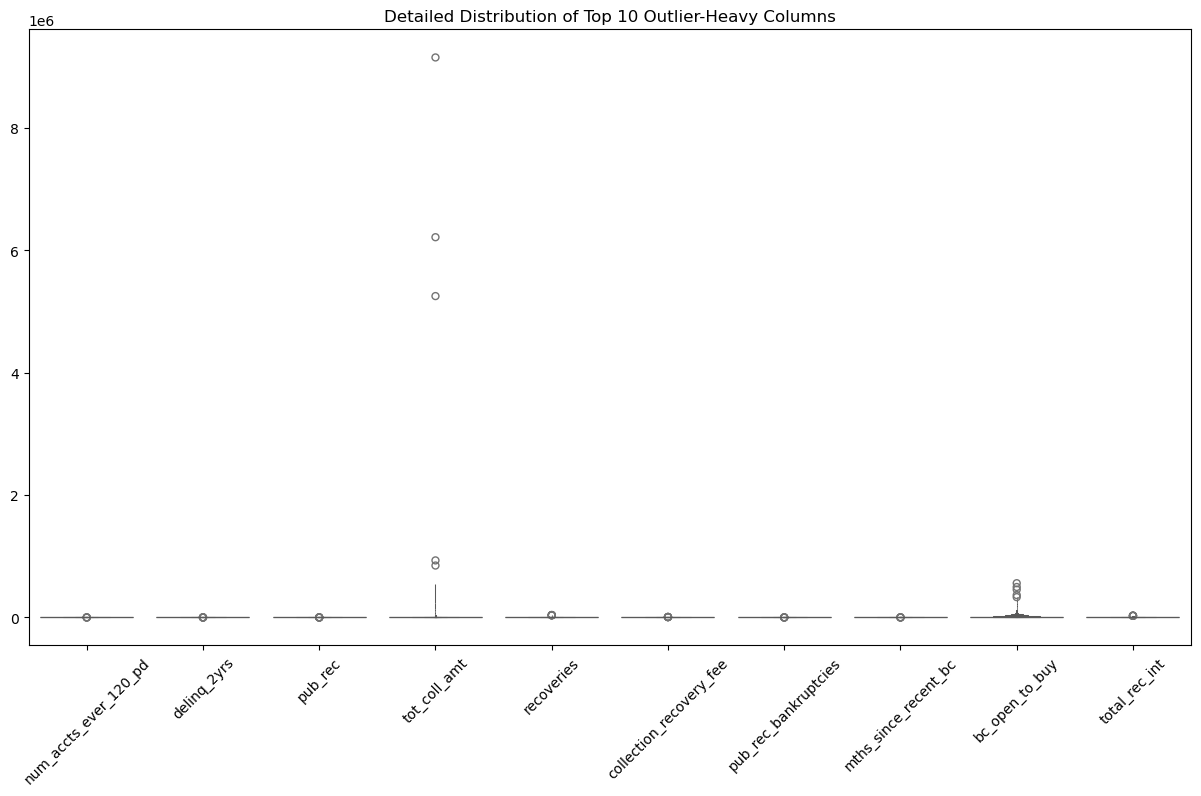

In [20]:
# Get the names of the top 10 outlier columns
top_outlier_cols = outlier_report.head(10).index.tolist()

plt.figure(figsize=(15, 8))
sns.boxenplot(data=df[top_outlier_cols], palette="Set2")
plt.xticks(rotation=45)
plt.title("Detailed Distribution of Top 10 Outlier-Heavy Columns")
plt.show()

In [21]:
#Summary of text columns for encoding later on
object_cols = df.select_dtypes(include=['object']).columns

# Create a summary of unique values
unique_counts = []
for col in object_cols:
    unique_counts.append({'Column': col, 'Unique_Values': df[col].nunique()})

unique_df = pd.DataFrame(unique_counts).sort_values(by='Unique_Values', ascending=False)

print(" Categorical Column Summary ")
print(unique_df)

 Categorical Column Summary 
                       Column  Unique_Values
0                          id        1345310
11                        url        1345310
4                   emp_title         378353
12                       desc         122004
14                      title          61681
15                   zip_code            943
17           earliest_cr_line            739
24   sec_app_earliest_cr_line            570
21         last_credit_pull_d            140
8                     issue_d            139
19               last_pymnt_d            135
37            settlement_date             89
35  debt_settlement_flag_date             83
16                 addr_state             51
3                   sub_grade             35
29        hardship_start_date             26
30          hardship_end_date             25
31    payment_plan_start_date             25
13                    purpose             14
5                  emp_length             11
27            hardship_rea

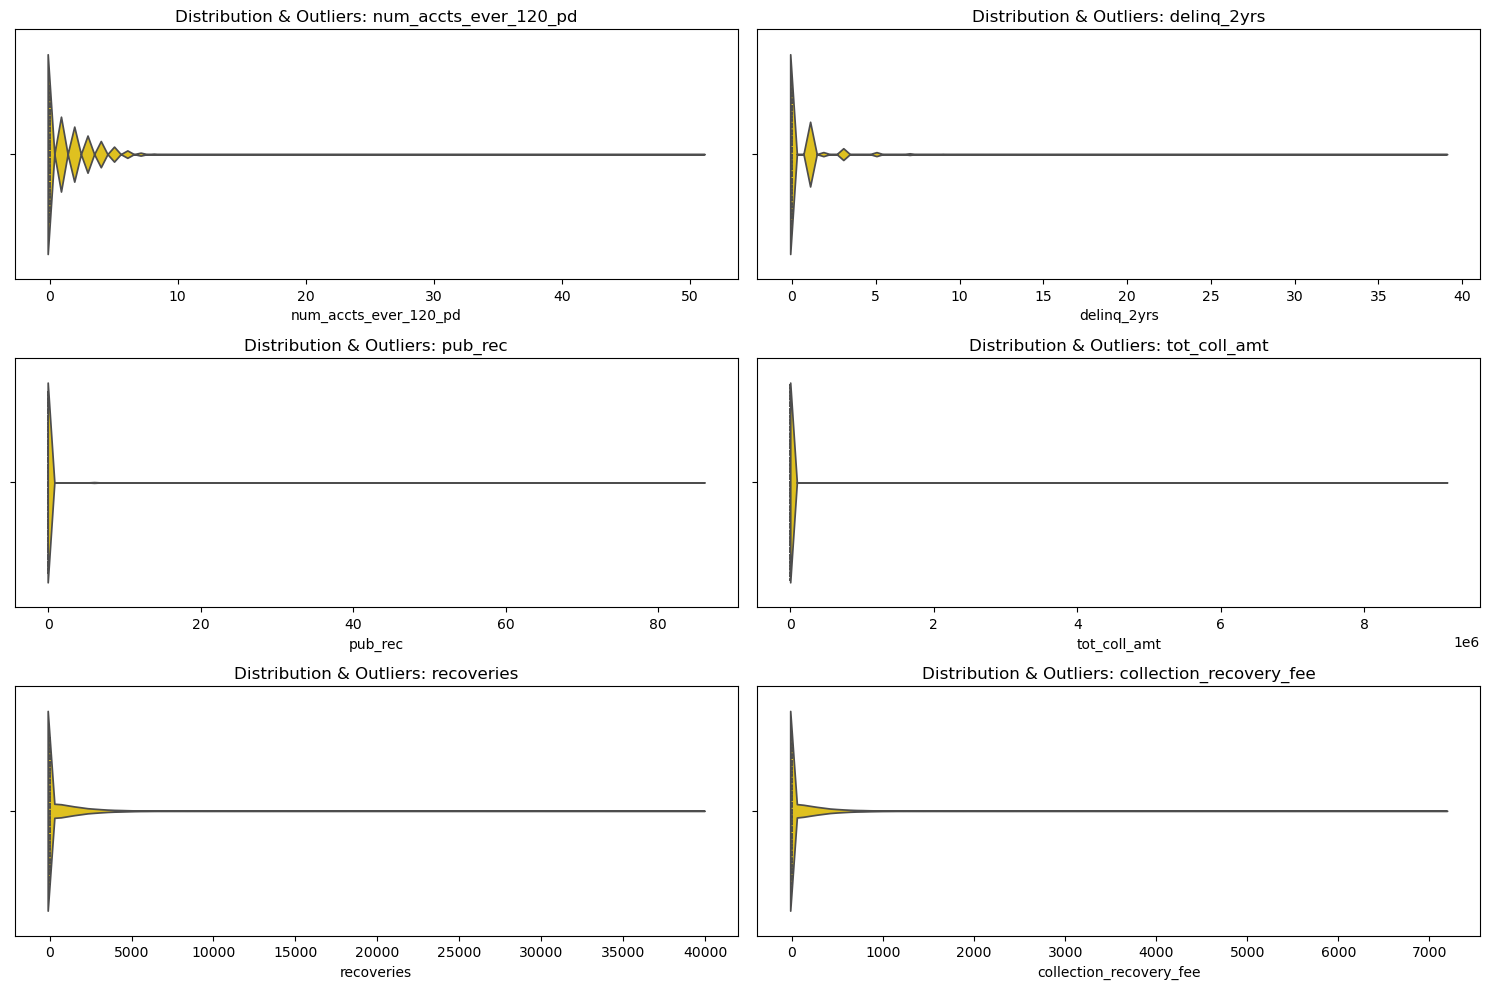

In [22]:
# Identify top 5 numeric columns with the most outliers (from our previous IQR check)
# Let's assume they are these common ones for now:
top_6_outliers = ['num_accts_ever_120_pd', 'delinq_2yrs', 'pub_rec', 'tot_coll_amt', 'recoveries','collection_recovery_fee']
plt.figure(figsize=(15, 10))
for i, col in enumerate(top_6_outliers):
    plt.subplot(3, 2, i+1)
    sns.violinplot(x=df[col], color="gold", inner="quartile")
    plt.title(f"Distribution & Outliers: {col}")

plt.tight_layout()
plt.show()

In [23]:
# Calculate missing percentage
missing_pct = (df.isnull().sum() / len(df)) * 100

# Group columns by missingness ranges
missing_50_plus = missing_pct[missing_pct > 50]
missing_20_to_50 = missing_pct[(missing_pct <= 50) & (missing_pct > 20)]
missing_low = missing_pct[(missing_pct <= 20) & (missing_pct > 0)]

print(f"Columns with >50% missing: {len(missing_50_plus)}")
print(f"Columns with 20-50% missing: {len(missing_20_to_50)}")
print(f"Columns with <20% missing: {len(missing_low)}")

# Display the 'dead' columns
print("\n These columns are likely to be dropped (>50% missing) ")
print(missing_50_plus.sort_values(ascending=False))

Columns with >50% missing: 58
Columns with 20-50% missing: 0
Columns with <20% missing: 47

 These columns are likely to be dropped (>50% missing) 
member_id                                     100.000000
next_pymnt_d                                  100.000000
orig_projected_additional_accrued_interest     99.720585
deferral_term                                  99.572292
hardship_end_date                              99.572292
hardship_last_payment_amount                   99.572292
hardship_reason                                99.572292
hardship_status                                99.572292
hardship_type                                  99.572292
hardship_start_date                            99.572292
payment_plan_start_date                        99.572292
hardship_length                                99.572292
hardship_payoff_balance_amount                 99.572292
hardship_amount                                99.572292
hardship_dpd                                   99.5722

In [24]:
#DATA-PREPROCESSING
# 1. Drop High Missing (>50%)
cols_to_drop_missing = missing_pct[missing_pct > 50].index.tolist()

# 2. Drop Constants (Unique values <= 1)
cols_to_drop_constant = unique_df[unique_df['Unique_Values'] <= 1]['Column'].tolist()

# 3. Drop Identifiers
cols_to_drop_ids = ['id', 'url', 'emp_title', 'title']

# 4. Drop Data Leakage (Future information)
leakage_cols = [
    'issue_d', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
    'earliest_cr_line', 'zip_code', 'addr_state', 'out_prncp', 'out_prncp_inv',
    'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
    'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
    'debt_settlement_flag', 'settlement_status', 'settlement_date', 'settlement_amount'
]

# Combine and drop
total_drop = list(set(cols_to_drop_missing + cols_to_drop_constant + cols_to_drop_ids + leakage_cols))
df_clean = df.drop(columns=[c for c in total_drop if c in df.columns])

print(f"Structural Clean Complete. Shape: {df_clean.shape}")

Structural Clean Complete. Shape: (1345310, 70)


In [25]:
# Separate types
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns

# Numeric: Fill with Median (Robust to outliers)
for col in numeric_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Categorical: Fill with Mode
for col in categorical_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

print(f"Imputation Complete. Remaining Nulls: {df_clean.isnull().sum().sum()}")

Imputation Complete. Remaining Nulls: 0


In [26]:
df_clean.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,10+ years,MORTGAGE,...,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,Cash
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,...,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,Cash
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,10+ years,MORTGAGE,...,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,Cash
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,3 years,MORTGAGE,...,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,Cash
5,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,4 years,RENT,...,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,Cash
6,20000.0,20000.0,20000.0,36 months,9.17,637.58,B,B2,10+ years,MORTGAGE,...,2.0,96.3,100.0,0.0,0.0,388852.0,116762.0,31500.0,46452.0,Cash
7,20000.0,20000.0,20000.0,36 months,8.49,631.26,B,B1,10+ years,MORTGAGE,...,0.0,93.3,0.0,0.0,0.0,193390.0,27937.0,14500.0,36144.0,Cash
8,10000.0,10000.0,10000.0,36 months,6.49,306.45,A,A2,6 years,RENT,...,2.0,95.7,28.6,1.0,0.0,61099.0,27957.0,16400.0,30799.0,Cash
9,8000.0,8000.0,8000.0,36 months,11.48,263.74,B,B5,10+ years,MORTGAGE,...,2.0,94.4,33.3,0.0,0.0,256513.0,113782.0,17000.0,135513.0,Cash
12,1400.0,1400.0,1400.0,36 months,12.88,47.10,C,C2,3 years,MORTGAGE,...,1.0,100.0,75.0,0.0,0.0,372109.0,75258.0,34500.0,55501.0,Cash


In [27]:
# 1. Map Target (0 = Safe, 1 = Default)
df_clean['loan_status'] = df_clean['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

# 2. Log Transform Income (Handles Skewness)
df_clean['annual_inc_log'] = np.log1p(df_clean['annual_inc'])

# 3. Clean Employment Length
def clean_emp(x):
    if pd.isna(x) or x == 'n/a': return 0
    x = str(x).replace('years','').replace('year','').replace('+','').replace('< 1','0').strip()
    return int(x)

df_clean['emp_length_int'] = df_clean['emp_length'].apply(clean_emp)

# Drop raw versions
df_clean.drop(columns=['annual_inc', 'emp_length'], inplace=True)
print("Feature Engineering Complete.")

Feature Engineering Complete.


In [28]:
def cap_outliers(column):
    lower_limit = column.quantile(0.01)
    upper_limit = column.quantile(0.99)
    return column.clip(lower_limit, upper_limit)

# Don't cap the target or the already-logged income
not_cap = ['loan_status', 'annual_inc_log']

# Apply to numeric columns
for col in df_clean.select_dtypes(include=[np.number]).columns:
    if col not in not_cap:
        df_clean[col] = cap_outliers(df_clean[col])

print("Outliers capped at 1st and 99th percentiles.")

Outliers capped at 1st and 99th percentiles.


In [29]:
#The "Redundancy" Check (Correlation)
corr_matrix = df_clean.select_dtypes(include=[np.number]).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
df_clean.drop(columns=to_drop, inplace=True)

print(f"Dropped {len(to_drop)} highly correlated columns.")

Dropped 17 highly correlated columns.


In [30]:
cats = df_clean.select_dtypes(include=['object']).columns

for col in cats:
    # Target Encoding: Replace text with its historical probability of default
    encoding_map = df_clean.groupby(col)['loan_status'].mean()
    df_clean[col + '_encoded'] = df_clean[col].map(encoding_map)

df_clean.drop(columns=cats, inplace=True)
print("Encoding Complete. ")

Encoding Complete. 


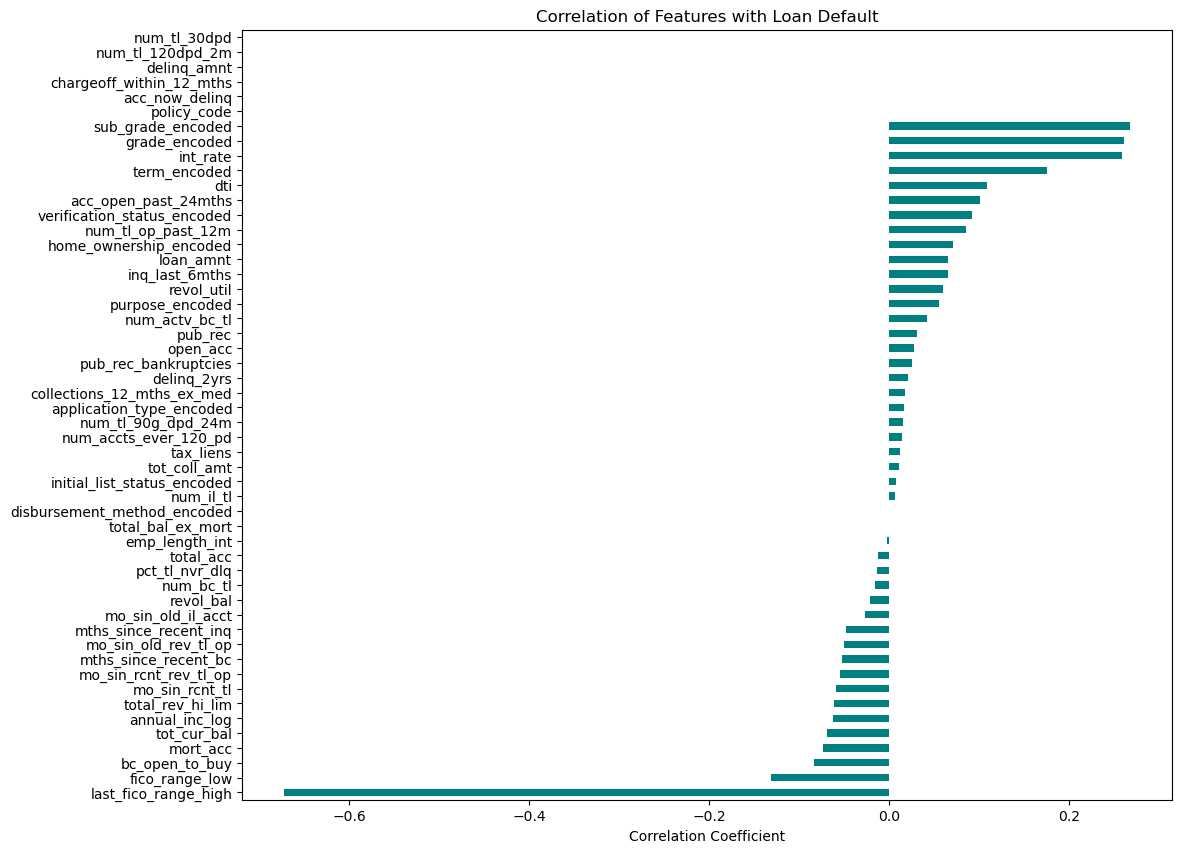

In [31]:
plt.figure(figsize=(12, 10))
# Only correlate numeric columns with our target
correlations = df_clean.select_dtypes(include=[np.number]).corr()['loan_status'].sort_values()

correlations.drop('loan_status').plot(kind='barh', color='teal')
plt.title("Correlation of Features with Loan Default")
plt.xlabel("Correlation Coefficient")
plt.show()

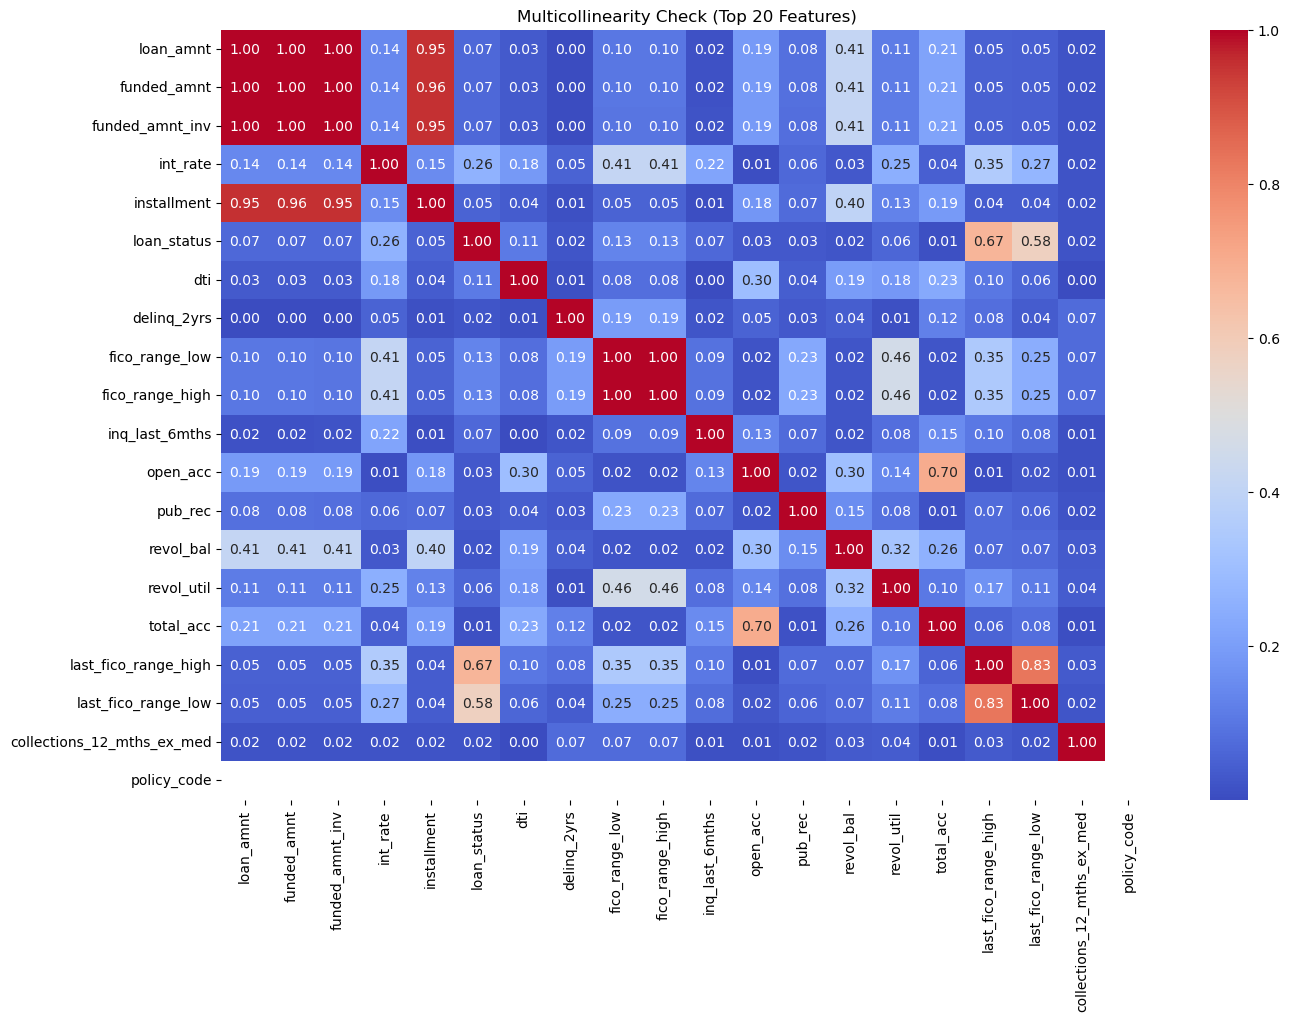

In [32]:
plt.figure(figsize=(15, 10))
# Plotting a subset of the correlation matrix for clarity
sns.heatmap(corr_matrix.iloc[:20, :20], annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Multicollinearity Check (Top 20 Features)")
plt.show()

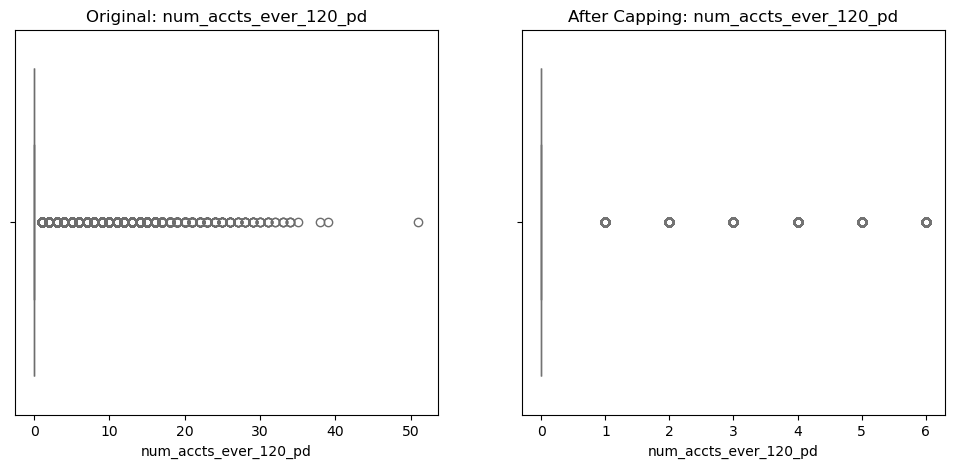

In [33]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['num_accts_ever_120_pd'], color='salmon')
plt.title("Original: num_accts_ever_120_pd")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['num_accts_ever_120_pd'], color='lightgreen')
plt.title("After Capping: num_accts_ever_120_pd")

plt.show()

In [34]:
from sklearn.preprocessing import RobustScaler

# Initialize the scaler
scaler = RobustScaler()

# Scale everything except the target
X = df_clean.drop('loan_status', axis=1)
y = df_clean['loan_status']

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print("Data successfully scaled using RobustScaler.")

Data successfully scaled using RobustScaler.


In [35]:
print(f"Final Shape after Multicollinearity Drop: {df_clean.shape}")

Final Shape after Multicollinearity Drop: (1345310, 53)


In [36]:
# Save the cleaned version of file
df_clean.to_csv('RiskBridge_Master_Clean.csv', index=False)

In [37]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 2. Train-Test Split (80/20)
# Stratify=y ensures both sets have the same % of defaulters
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 3. SMOTE: Balance only the Training data
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

print(f"Original Training Class Distribution: {y_train.value_counts()}")
print(f"Balanced Training Class Distribution: {y_train_bal.value_counts()}")

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

Original Training Class Distribution: loan_status
0    861401
1    214847
Name: count, dtype: int64
Balanced Training Class Distribution: loan_status
1    861401
0    861401
Name: count, dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:29:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


   HYBRID MODEL PERFORMANCE
              precision    recall  f1-score   support

           0       0.96      0.91      0.94    215350
           1       0.71      0.85      0.78     53712

    accuracy                           0.90    269062
   macro avg       0.84      0.88      0.86    269062
weighted avg       0.91      0.90      0.91    269062

ROC-AUC Score: 0.9510


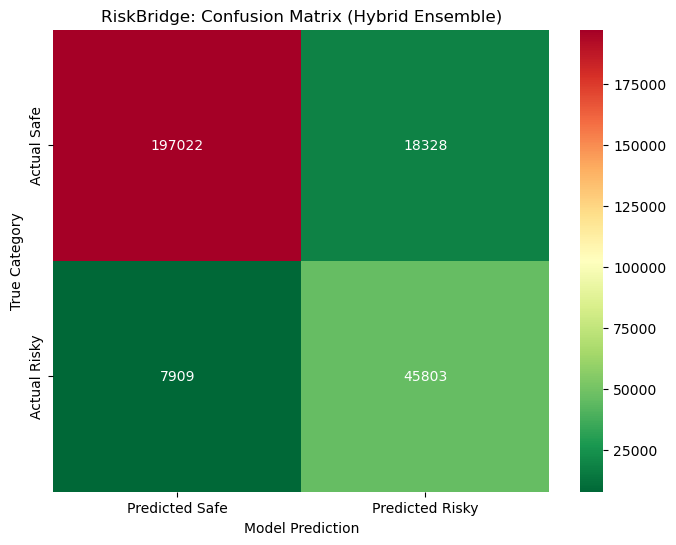

In [38]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Initialize the Hybrid Model
lr = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
xgb = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, 
                    random_state=42, use_label_encoder=False, eval_metric='logloss')

hybrid_model = VotingClassifier(estimators=[('lr', lr), ('xgb', xgb)], voting='soft')

# 2. Train on the Balanced Data
hybrid_model.fit(X_train_bal, y_train_bal)

# 3. Get Predictions
y_pred = hybrid_model.predict(X_test)
y_prob = hybrid_model.predict_proba(X_test)[:, 1]

# 4. Evaluation Outputs
print("   HYBRID MODEL PERFORMANCE")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

# 5. Visualizing the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlGn_r', 
            xticklabels=['Predicted Safe', 'Predicted Risky'], 
            yticklabels=['Actual Safe', 'Actual Risky'])
plt.title('RiskBridge: Confusion Matrix (Hybrid Ensemble)')
plt.ylabel('True Category')
plt.xlabel('Model Prediction')
plt.show()

In [39]:
# Create the results dataframe
# We reset index on y_test to make sure it aligns perfectly with the predictions
df_results = pd.DataFrame({
    'Actual_Status': y_test.values,
    'Predicted_Status': y_pred,
    'Risk_Probability': y_prob
})

print(df_results.head())

   Actual_Status  Predicted_Status  Risk_Probability
0              0                 0          0.014733
1              0                 0          0.004416
2              0                 0          0.342453
3              0                 0          0.213413
4              0                 0          0.189247


In [40]:
# 1. Top 5 Most Certain "Risky" Loans (Model is 99% sure they will default)
certain_risky = df_results[(df_results['Actual_Status'] == 1) & 
                           (df_results['Predicted_Status'] == 1)].sort_values(by='Risk_Probability', ascending=False)

# 2. Top 5 Most Certain "Safe" Loans (Model is 99% sure they are safe)
certain_safe = df_results[(df_results['Actual_Status'] == 0) & 
                          (df_results['Predicted_Status'] == 0)].sort_values(by='Risk_Probability', ascending=True)

# 3. Top 5 "Confused" Predictions (Close to 0.5 - the "Flip a Coin" zone)
# We find the ones closest to 50% probability
df_results['uncertainty'] = abs(df_results['Risk_Probability'] - 0.5)
most_uncertain = df_results.sort_values(by='uncertainty').head(5)

print("\n Top 5 Most Certain Risky Predictions ")
print(certain_risky.head(5))

print("\n Top 5 Most Uncertain Predictions ")
print(most_uncertain[['Actual_Status', 'Predicted_Status', 'Risk_Probability']])


 Top 5 Most Certain Risky Predictions 
        Actual_Status  Predicted_Status  Risk_Probability
91423               1                 1          0.992801
39966               1                 1          0.990049
153344              1                 1          0.990040
18506               1                 1          0.989965
30963               1                 1          0.989704

 Top 5 Most Uncertain Predictions 
        Actual_Status  Predicted_Status  Risk_Probability
16782               1                 0          0.499974
106044              1                 0          0.499969
240372              0                 0          0.499951
268806              1                 0          0.499949
215986              0                 0          0.499949


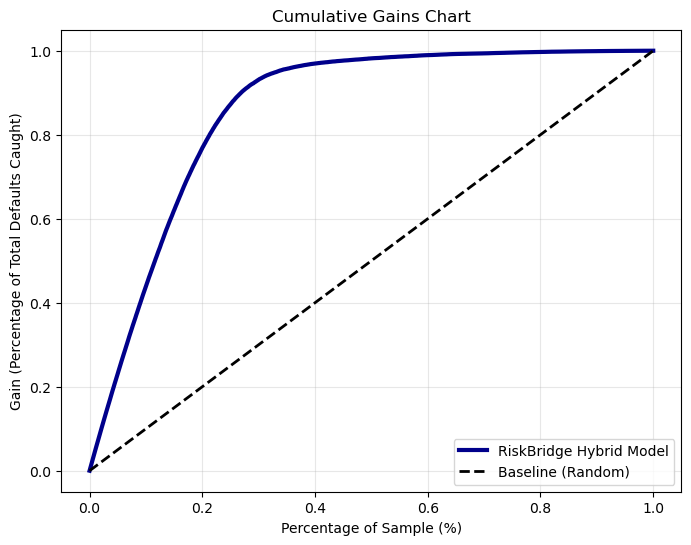

In [41]:
def plot_cumulative_gain_manual(y_true, y_probs, title='Cumulative Gains Chart'):
    # Sort indices by probability (descending)
    idx = np.argsort(y_probs)[::-1]
    y_true_sorted = np.array(y_true)[idx]
    
    # Calculate cumulative gain
    gains = np.cumsum(y_true_sorted) / np.sum(y_true_sorted)
    percentages = np.arange(1, len(gains) + 1) / len(gains)
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(percentages, gains, lw=3, color='darkblue', label='RiskBridge Hybrid Model')
    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Baseline (Random)')
    
    plt.xlabel('Percentage of Sample (%)')
    plt.ylabel('Gain (Percentage of Total Defaults Caught)')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.show()

# Run it!
plot_cumulative_gain_manual(y_test, y_prob)

In [42]:
import joblib

# 1. Save the Hybrid Ensemble Model
joblib.dump(hybrid_model, 'riskbridge_hybrid_model.pkl')

# 2. Save the Scaler (critical for preprocessing new data)
joblib.dump(scaler, 'riskbridge_scaler.pkl')

# 3. Save the list of final features (so we know which columns to use later)
final_features = X.columns.tolist()
joblib.dump(final_features, 'riskbridge_features.pkl')


['riskbridge_features.pkl']

In [43]:
# 4. Calculate medians for all numeric columns in your training set
training_medians = df_clean.select_dtypes(include=[np.number]).median().to_dict()

# 5. Save the dictionary
joblib.dump(training_medians, 'riskbridge_medians.pkl')

['riskbridge_medians.pkl']

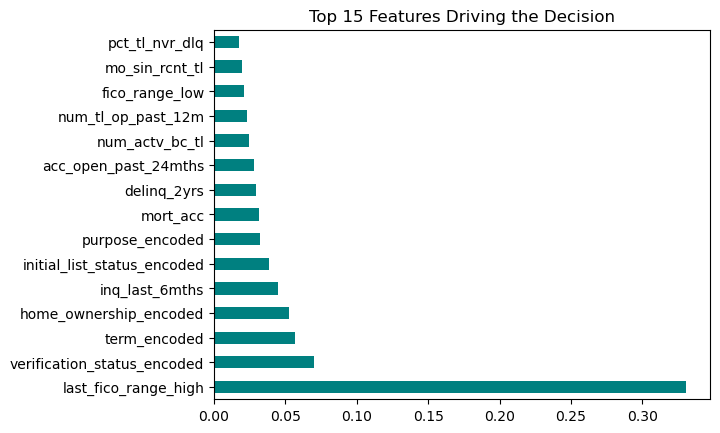

In [44]:

# 1. LOAD ASSETS
hybrid_model = joblib.load('riskbridge_hybrid_model.pkl')
scaler = joblib.load('riskbridge_scaler.pkl')
model_columns = joblib.load('riskbridge_features.pkl') 
training_medians = joblib.load('riskbridge_medians.pkl')
# Get feature importance from the XGBoost part of your hybrid model
# Assuming your hybrid model has an 'xgb' component
xgb_model = hybrid_model.estimators_[1] # 1 is usually XGB in our setup
importances = xgb_model.feature_importances_
feat_importances = pd.Series(importances, index=model_columns)

# Plot the top 15
feat_importances.nlargest(15).plot(kind='barh', color='teal')
plt.title("Top 15 Features Driving the Decision")
plt.show()